___

<center><h1> Karthik Kalaiyarasu - World of Data Science & Beyond!!! </h1></center>
___


# Stock Market Analysis on Automobile Industry


This analysis will be based on the automobile companies Tesla, Ford and General Motors based on technical analysis, visualization and also analyzing which stock has the most wide range in daily returns. The data is pulled from Google.

#### The following questions will be explored in this analysis:

- What was the change in price of the stock over time?
- What was the daily return of the stock on average?
- What was the moving average of the various stocks?
- what are the relationships between stocks' opening prices?
- what are the relationships between stocks' closing prices?
- Relationships between stocks' daily returns
- How much value do we put at risk by investing in a particular stock?

In [445]:
#importing essential libraries for preprocessing and visualization
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [446]:
#importing library for reading stock datas and time values
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [447]:
import warnings
warnings.filterwarnings('ignore')

#### Requesting stock datas from quandl
In this section, the stock data's are pulled from google and will be analyzed from the year 2012 till March-01-2018.

In [448]:
# Setting the start and end date.
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2018,3,1)

In [449]:
#Grabbing stock data for tesla, ford & GM.
tesla = web.DataReader('TSLA', 'google', start, end)
ford = web.DataReader('F','google', start, end)
gm = web.DataReader('GM', 'google', start, end)

#### Getting a sneekpeak at the first few rows from the dataset of the stock list Tesla and understanding more about the dataset

In [450]:
#First few rows from the tesla dataset
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [451]:
#Info
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1550 entries, 2012-01-03 to 2018-03-01
Data columns (total 5 columns):
Open      1550 non-null float64
High      1550 non-null float64
Low       1550 non-null float64
Close     1550 non-null float64
Volume    1550 non-null int64
dtypes: float64(4), int64(1)
memory usage: 72.7 KB


#### Plotting the linear graph for stocks' 'Open' price 

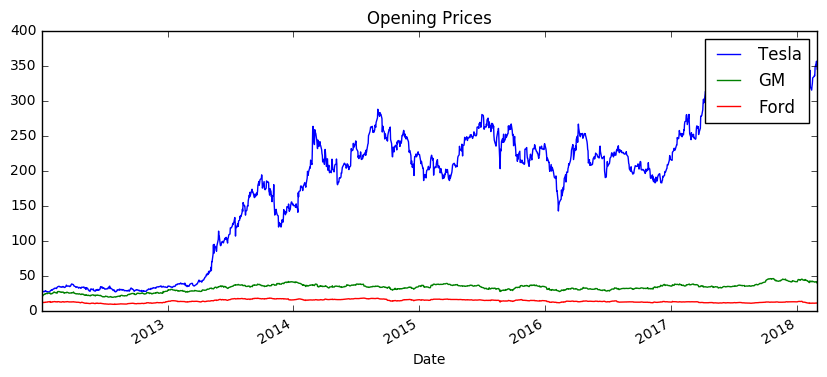

In [452]:
tesla['Open'].plot(label='Tesla', figsize=(10,4), title = 'Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend();

#### Plotting the stocks 'Volume' traded per day

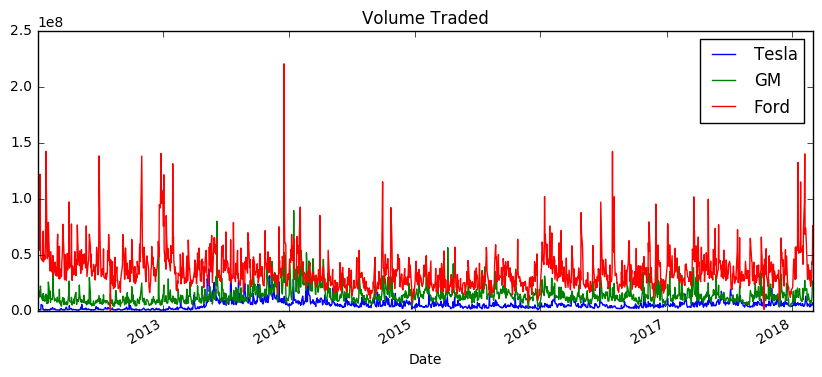

In [453]:
tesla['Volume'].plot(label='Tesla',figsize=(10,4),title = 'Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

In [454]:
#Finding the highest trade date of Ford as seen in the graph
ford['Volume'].max()

220362796

In [455]:
#Finding the exact date in which Ford traded the highest to have a further analysis for the sudden spike
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

Based on the above analysis, it is observed that Ford did a major volume trading on the Dec -18 - 2013. Doing a quick search on the news, we could find out that Ford shares fell sharply Wednesday after the company warned the cost of its aggressive push to launch new products which would cut into profits next year. This had led for the huge volumes of stocks on that particular date. 

More information about the news can be read in this link: http://money.cnn.com/2013/12/18/news/companies/ford-profit/index.html

#### Based on the Price Time Series Visualization, it seems Tesla looks like a much valuable company as compared to GM and Ford. To really understand the value of the company, we need to analyze the Market capitalization. The Market cap can be calculated by multiplying the price of a stock by its total number of outstanding shares. For Eg: If a company with 10 million shares are selling at 3 dollars a share, it would have a market cap of 300 Million Dollars.

#### Since, the current data does not have that information of total units of stock present, we can at least try to represent the total money traded. This can be calculated by multiplying Volume column by the Open Price. 

#### NOTE: This isnt the actual Market Capitalization. We could get a visual representation of the total amount of money being traded around the time series.

In [456]:
#Creating a new column for each company "Total Traded" from which we could infer the amount of money being traded.
tesla['Total Traded'] = tesla['Volume'] * tesla['Open']
gm['Total Traded'] = gm['Volume'] * gm['Open']
ford['Total Traded'] = ford['Volume'] * ford['Open']

In [457]:
#Checking the values of Total Traded for Tesla
tesla.head()

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00


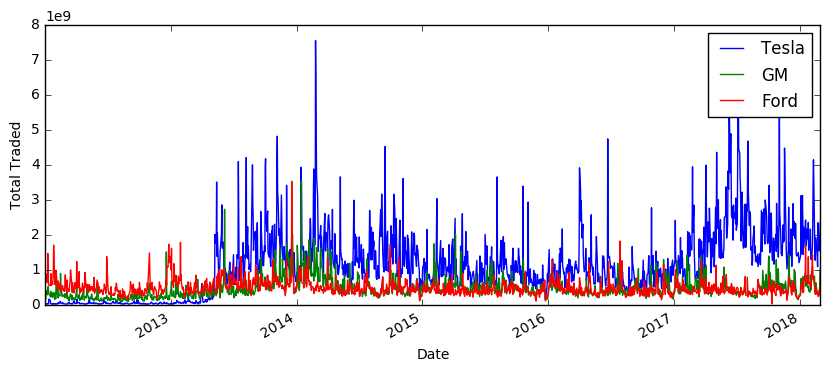

In [458]:
#Plottin "Total Traded" against the time index.
tesla['Total Traded'].plot(label='Tesla', figsize = [10,4])
gm['Total Traded'].plot(label = 'GM')
ford['Total Traded'].plot(label = 'Ford')
plt.xlabel('Date')
plt.ylabel('Total Traded')
plt.legend();

#### There seems to be a major spike during somewhere in early 2014. We can do a further analysis to understand what led to the increase in money traded during that day.


In [459]:
#Finding the date for the maximum money traded
tesla['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

Based on the above captured date of Feb 25th 2014, we can understand from news media that Tesla is expected to officially announce plans to open a massive new lithium battery factory, dubbed the "Gigafactory," which CEO Elon Musk says will have capacity equal to all factories making such batteries around the globe. Hence this could drive sales by lowering the cost of lithium batteries and the same was given as a financial report by Morgan Stanley which rose the stock market values.


More information could be read from the link here: http://money.cnn.com/2014/02/25/investing/tesla-record-high/index.html

#### Now that we have observed the maximum value traded, we can go ahead analyzing the Moving Averages for the three companies. Moving averages is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

More information on Moving Average(MA) can be found from this link: http://www.investopedia.com/terms/m/movingaverage.asp

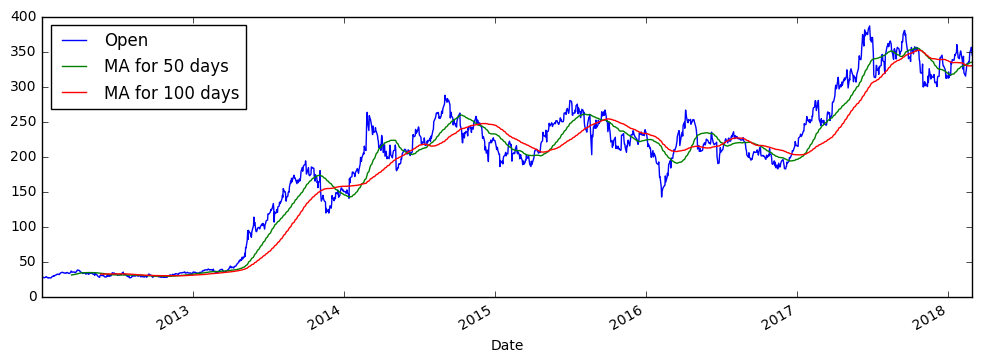

In [460]:
#Plotting Moving Averages for 50 and 100 days for Tesla
tesla['MA for 50 days'] = tesla['Open'].rolling(50).mean()
tesla['MA for 100 days'] = tesla['Open'].rolling(100).mean()
tesla[['Open','MA for 50 days','MA for 100 days']].plot(figsize =[12,4]);

#### We can now start analysing a relationship between the three stocks using the stock's Open price, which could be visualized using a scatter matrix. 


In [461]:
# Combining the three dataframe open price to one dataframe and naming the columns
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis = 1)
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']

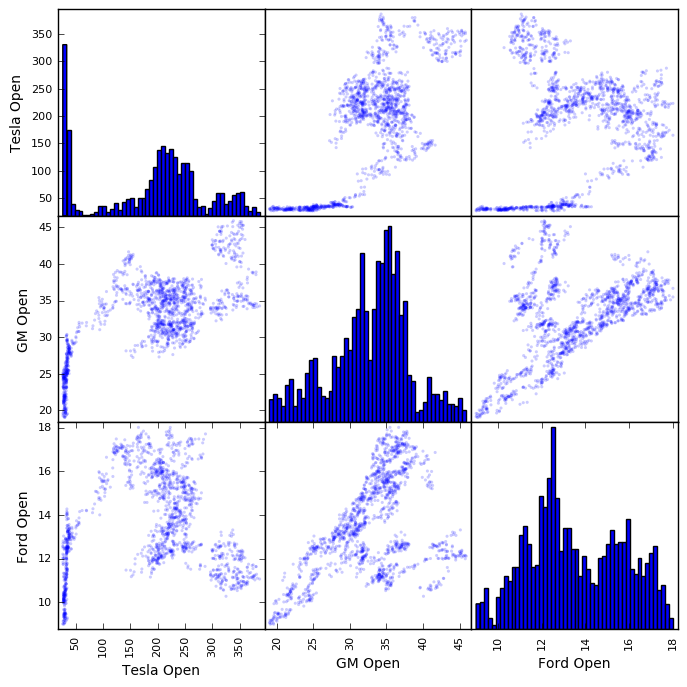

In [462]:
scatter_matrix(car_comp, figsize=[8,8], alpha = 0.2, hist_kwds={'bins':50});

It is observed from the above scatter matrix that there is a strong correlation between GM & Ford Open Prices. Generally the stocks for the two companies always remained the same while Tesla had a higher opening. 

#### We can now move on to the daily returns analysis where we could inform us the percent gain or loss if a stock is purchased on a day and sold in the next day. This will be helpful in analyzing the volatility of the stock. 

#### We will calculate the percent returns and then plot with a histogram to see which stock is less volatile and stable. 


In [463]:
#Creating a new column 'returns' and finding the returns using pandas' built in pct_change method
tesla['returns'] = tesla['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)

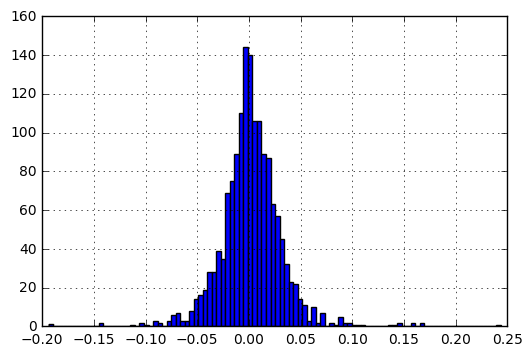

In [464]:
# Plotting the histogram of tesla returns 
tesla['returns'].hist(bins=100);

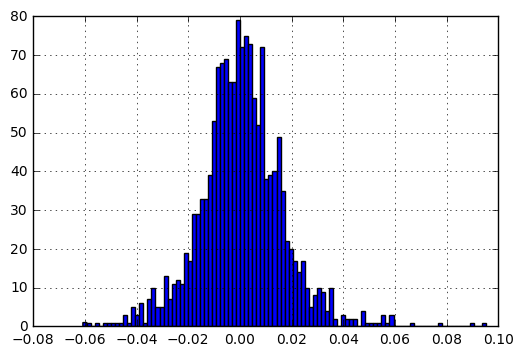

In [465]:
# Plotting the histogram of GM's returns 
gm['returns'].hist(bins=100);

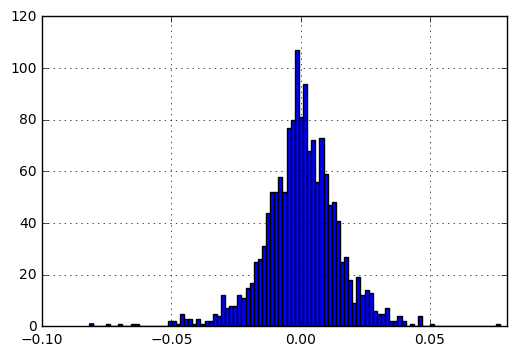

In [466]:
# Plotting the histogram of Ford returns 
ford['returns'].hist(bins=100);

Now that we have seen the individual histograms of the returns, we can plot a combined histogram to compare the volatility.

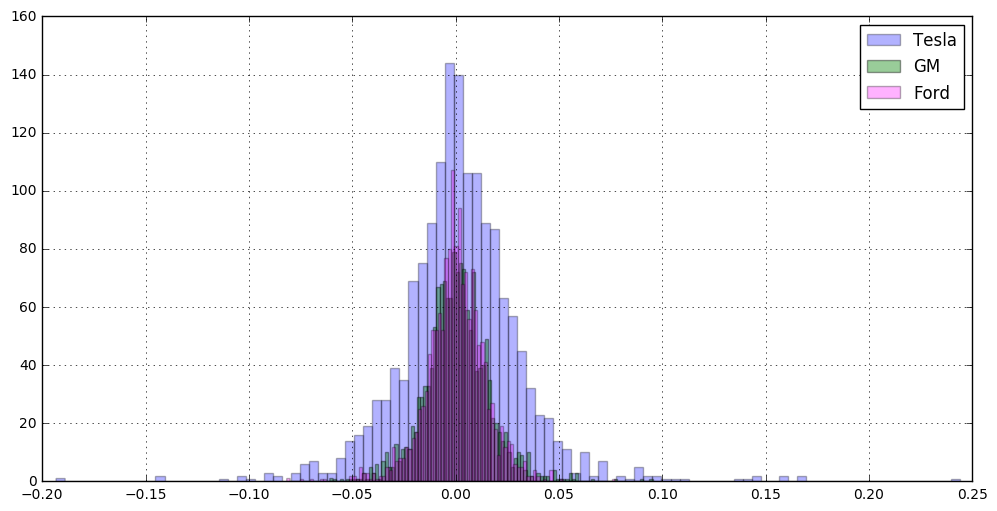

In [467]:
tesla['returns'].hist(bins=100, label='Tesla', figsize=[12,6], alpha = 0.3)
gm['returns'].hist(bins=100, label = 'GM', alpha = 0.4)
ford['returns'].hist(bins=100, label='Ford', color = 'magenta', alpha = 0.3)
plt.legend();

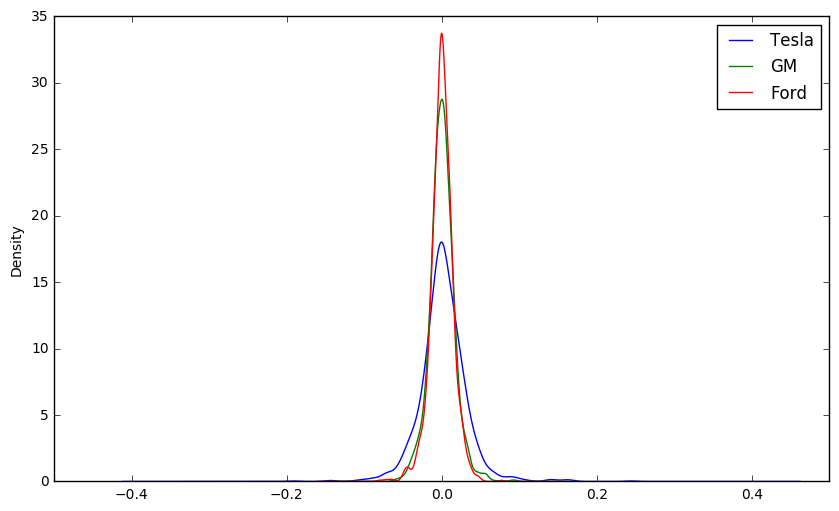

In [468]:
#plotting a (Kernal Density)KDE kind to have a better view to check which stock has the widest plot
tesla['returns'].plot(kind='kde', label ='Tesla', figsize = [10,6])
gm['returns'].plot(kind='kde', label='GM')
ford['returns'].plot(kind='kde', label='Ford')
plt.legend();

It is observed that Ford has the most stable peak. It has almost the same returns and remains as a flat stock. Tesla is more wider and tends to be volatile. 

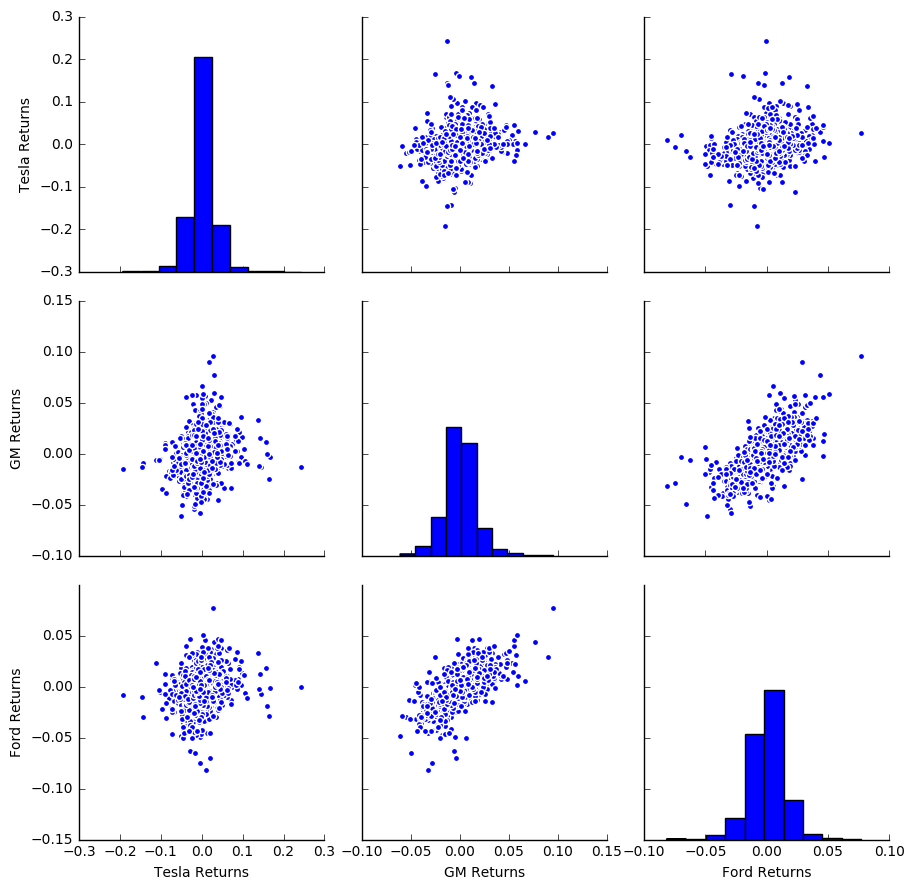

In [469]:
#Comparing the returns for the three stocks
returns_df = pd.concat([tesla['returns'],gm['returns'], ford['returns']], axis =1)
returns_df.columns = ['Tesla Returns','GM Returns', 'Ford Returns']
sns.pairplot(returns_df.dropna(),size=3);

From the above chart, we can see that there is an interesting relationship between Ford and GM daily returns. It might be interesting to further analyse that individual comparison.

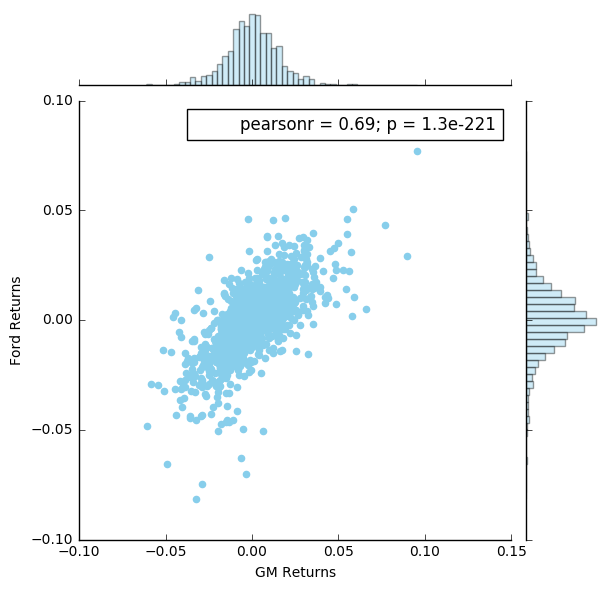

In [470]:
# using joinplot to compare the daily returns of Ford and GM
plot_df = pd.concat([gm['returns'], ford['returns']], axis =1)
plot_df.columns = ['GM Returns', 'Ford Returns']
sns.jointplot(x="GM Returns", y="Ford Returns", data=plot_df, kind='scatter',size=6, color = 'skyblue');

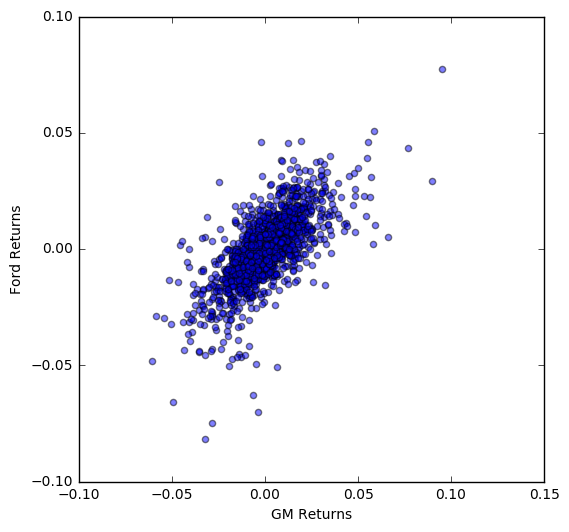

In [471]:
plot_df.plot(kind='scatter', x='GM Returns', y='Ford Returns', alpha = 0.5, figsize = [6,6]);

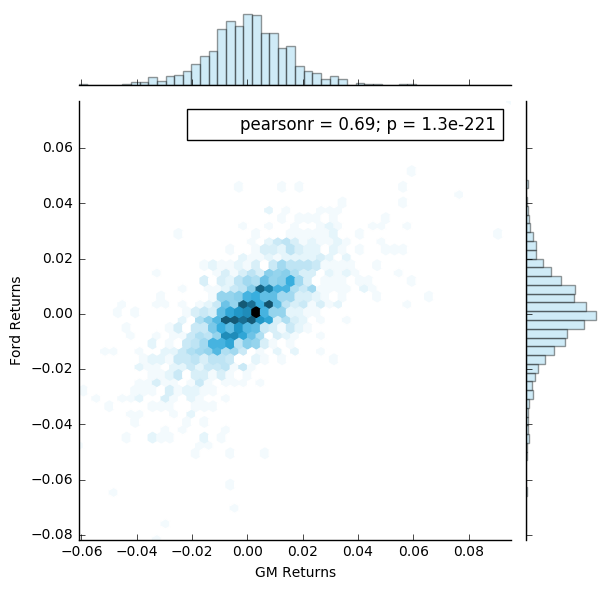

In [472]:
#using hexplot
sns.jointplot(x="GM Returns", y="Ford Returns", data=plot_df, kind='hex',size=6, color='skyblue');

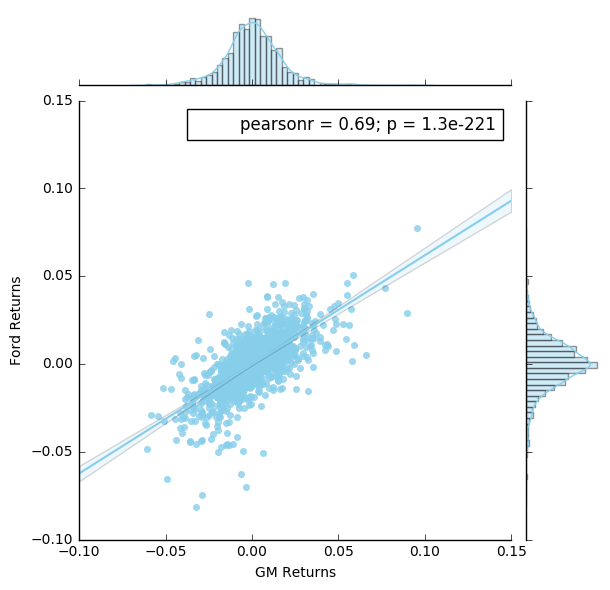

In [473]:
# analyzing Ford and Tesla with reg jointplot
sns.jointplot(x="GM Returns", y="Ford Returns", data=plot_df, kind='reg', size=6, color='skyblue');

It can be seen from the pearson coefficient value, it has a strong corelation between Ford and GM returns. 

More information about pearson can be found in this link: http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

#### We have almost done an extension analysis between the three stocks and also analysed the daily returns which yeild that Tesla had the most wide ranging in daily returns. 

#### Now we shall dive into cummulative daily returns to understand the value that would be worth today if we invested stocks in the beggining of the time series. 

The formula to calculate the cumulative return is:

ii=(1+rt)∗it−1

and using pandas cumprod() method, we could use df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod() to calculate the stocks cumulative returns

In [474]:
#Creating a cumulative daily return column for dataframe
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

In [475]:
#Sneakpeak into few rows to check the cumulative return
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,MA for 50 days,MA for 100 days,returns,Cumulative Return
Date,,,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,NaN,NaN,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,NaN,NaN,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,NaN,NaN,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,NaN,NaN,0.013388,0.970442


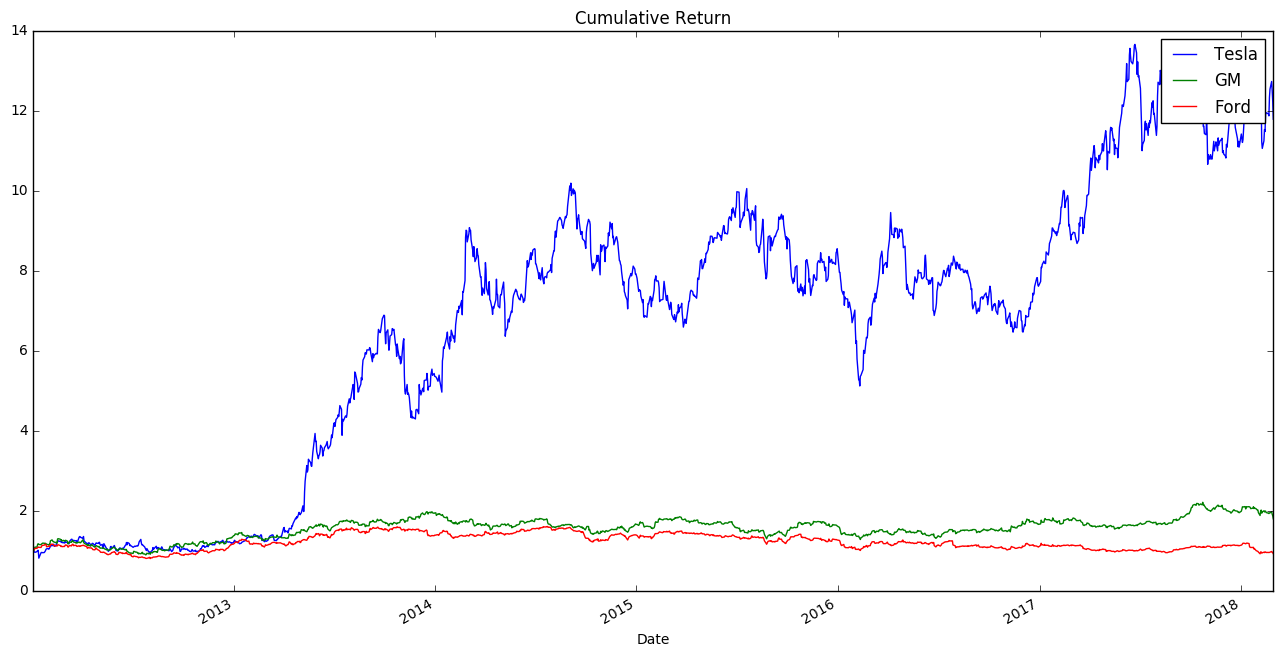

In [477]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
gm['Cumulative Return'].plot(label='GM')
ford['Cumulative Return'].plot(label='Ford')
plt.legend();

#### It is clear that Tesla has the highest returns. Almost the three companies start off with a similar stock price but Tesla have a huge leap as compared to GM and Ford. Ford remains the least amongst the three.  